<a href="https://colab.research.google.com/github/valenja9/co_python_umi/blob/main/price_alert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import time
import pandas as pd
# import pyttsx3
import requests


df = pd.read_csv('Coins.csv', usecols=['Symbol','Up','Down'])
df = df.to_json()
df = json.loads(df)

symbols = df['Symbol']
Up_limits = df['Up']
Down_limits = df['Down']

symbols = [symbols[x] for x in symbols]
Up_limits = [1000000 if Up_limits[x] is None else float(Up_limits[x]) for x in Up_limits]
Down_limits = [0 if Down_limits[x] is None else float(Down_limits[x]) for x in Down_limits]

headers = {
  'content-type': 'application/json',
  'X-CMC_PRO_API_KEY': '46e19e3c-6bf8-4e03-87b1-82fb012beeeb',
}

current_price = [0] * len(symbols)
symbols_id = [0 for x in range(len(symbols))]

api = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest?sort=market_cap&start=1&limit=5000&convert=USD'
data = requests.get(api, headers=headers).json()['data']

for currency in data:
    if currency['name'] in symbols:
        symbols_id[symbols.index(currency['name'])] = currency['id']

api = 'https://api.coinmarketcap.com/v2/ticker/'

# engine = pyttsx3.init()

def printing():
    while True:
        api = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest?sort=market_cap&start=1&limit=5000&convert=USD'

        data = requests.get(api, headers=headers).json()['data']
        index = 0
        for symbol in symbols_id:
            for coin in data:
                if(symbol == coin["id"]):
                    current_price[index] = float(coin['quote']['USD']['price'])
                    if current_price[index] > Up_limits[index]:
                        print("%-10s price is %.2f" % (symbols[index],current_price[index]))
                        # speak("%-10s price is %.2f" % (symbols[index],current_price[index]))
                    if current_price[index] < Down_limits[index]:
                        # speak("%-10s price dropped %.2f" % (symbols[index],current_price[index]))
                        print("%-10s price dropped %.2f" % (symbols[index],current_price[index]))
                        # speak("%-10s price dropped %.2f" % (symbols[index],current_price[index]))
                    index+=1
        time.sleep(300)


# def speak(message):
#     print(message)
#     engine.say(message)
#     engine.runAndWait()
printing()

FileNotFoundError: ignored

In [ ]:
import requests
from prettytable import PrettyTable
import os

listings_api = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'


headers = {
  'content-type': 'application/json',
  'X-CMC_PRO_API_KEY': '46e19e3c-6bf8-4e03-87b1-82fb012beeeb',
}

listings_data = requests.get(listings_api,headers=headers).json()
listings_data = listings_data['data']
# for i in listings_data:
#   # if i["name"] =="Bitcoin":
#     print(i)
table = PrettyTable()
table.field_names = ['Index','Name','Symbol','Price','Volume','MarketCap','Change 1h','Change 24h','Change 7d']

def isNone(number):
    if number:
        return float(number)
    return 0

i = 1
nr_coins = 0
coins = []
for ticker_data in listings_data:

        name = ticker_data['name']
        symbol = ticker_data['symbol']

        coin = ticker_data['quote']['USD']

        coins.append([  i,
                        name,
                        symbol,
                        isNone(coin['price']),
                        isNone(coin['volume_24h']),
                        isNone(coin['market_cap']),
                        isNone(coin['percent_change_1h']),
                        isNone(coin['percent_change_24h']),
                        isNone(coin['percent_change_7d'])])

        i += 1

while True:
    number = 1
    print("Press:")
    for item in table.field_names:
        print(str(number)+ ". Sort by " + item)
        number += 1

    choice = input("Choose sort option: ")

    coins.sort(key=lambda x: x[int(choice)-1])
  
    # coins.reverse()

    [table.add_row(coin) for coin in  [i for i in coins if i[2] in ["BTC","ETH","LTC","Chainlink","XRP"]]]

    os.system('cls')
    print(table)
    table.clear_rows()

Press:
1. Sort by Index
2. Sort by Name
3. Sort by Symbol
4. Sort by Price
5. Sort by Volume
6. Sort by MarketCap
7. Sort by Change 1h
8. Sort by Change 24h
9. Sort by Change 7d
Choose sort option: 4
+-------+----------+--------+-------------------+--------------------+--------------------+------------+-------------+-------------+
| Index |   Name   | Symbol |       Price       |       Volume       |     MarketCap      | Change 1h  |  Change 24h |  Change 7d  |
+-------+----------+--------+-------------------+--------------------+--------------------+------------+-------------+-------------+
|   3   |   XRP    |  XRP   |  0.57761138816345 | 10846147640.327244 | 26197461770.993275 | 0.72957793 |  5.55454996 | -8.38318892 |
|   6   | Litecoin |  LTC   | 74.90244727519469 | 3219884018.0838366 | 4947909486.530162  | 0.73288554 | -0.68829813 | -15.3720683 |
|   2   | Ethereum |  ETH   | 564.2670330767687 | 12115954058.114008 | 64201062799.238464 | 1.01849943 | -0.39059632 | -8.08782037 |
| 

KeyboardInterrupt: ignored

In [ ]:
%%writefile Portfolio.txt
Symbol,Quantity,Price
Waves,175,0.9
Bitcoin,1,6200
ICON,1732,0.123

Writing Portfolio.txt


In [ ]:
import requests
from prettytable import PrettyTable
import datetime
import pandas as pd
import plotly.express as px
import pandas_datareader as web

file = open('Portfolio.txt','r')

headers = {
  'content-type': 'application/json',
  'X-CMC_PRO_API_KEY': '46e19e3c-6bf8-4e03-87b1-82fb012beeeb',
}

Symbols = []
Quantitys = []
Buy_prices = []

for line in file.readlines()[1:]:
    line = line.split(',')
    Symbols.append(line[0])
    Quantitys.append(float(line[1]))
    Buy_prices.append(float(line[2]))

api = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest?sort=market_cap&start=1&limit=5000&convert=USD'
data = requests.get(api, headers=headers).json()['data']

symbols_id = [0] * len(Symbols)


#hashrate
response = requests.get("https://blockchain.info/q/hashrate")
print(response.json())

#fear greet index
url ="https://api.alternative.me/fng/?limit=1"
#to json
fr = requests.get(url).json()["data"][0]['value']


table = PrettyTable()
table.field_names = ["Name","Quantity","Buy Price",'current price',"Profit","Change 1h","Change 1d","Change 7d", "hashrate","fear greed index"]





for currency in data:
    if currency['name'] in Symbols:
        symbols_id[Symbols.index(currency['name'])] = currency['id']


def color(nr):
    if nr > 0:
        return ('\033[92m' + str(nr) + '\033[0m')+"%"
    else:
        return ('\033[91m' + str(nr) + '\033[0m')+"%"

current_value = 0
buy_value = 0
i = 0
for symbol in symbols_id:
    for coin in data:
        if(symbol == coin["id"]):
            print(coin)
            current_price = float(coin['quote']['USD']['price'])
            change_1h = float(coin['quote']['USD']['percent_change_1h'])
            change_1d = float(coin['quote']['USD']['percent_change_24h'])
            change_7d = float(coin['quote']['USD']['percent_change_7d'])
            hash_rate = response.json()


            profit = round(current_price/Buy_prices[i]*100-100,2)
            buy_value += Buy_prices[i] * Quantitys[i]
            current_value += current_price * Quantitys[i]
            table.add_row([Symbols[i],Quantitys[i],Buy_prices[i],current_price,color(profit),
                           color(change_1h),color(change_1d),color(change_7d),hash_rate,fr])
            i += 1
            break

print(table)
total_profit = current_value / buy_value * 100 - 100
dolars = current_value - buy_value

print("Portfolio Value: %.2f   Total Profit: %.2f%%   Total Profit USD: %.2f" % (current_value,
                                                                               total_profit,dolars))

120943030491
{'id': 1274, 'name': 'Waves', 'symbol': 'WAVES', 'slug': 'waves', 'num_market_pairs': 155, 'date_added': '2016-06-02T00:00:00.000Z', 'tags': ['lpos', 'platform', 'smart-contracts'], 'max_supply': None, 'circulating_supply': 103759708, 'total_supply': 103759708, 'platform': None, 'cmc_rank': 30, 'last_updated': '2020-12-10T20:03:03.000Z', 'quote': {'USD': {'price': 8.1516865646934, 'volume_24h': 124711901.02915432, 'percent_change_1h': -1.89730133, 'percent_change_24h': -5.70278898, 'percent_change_7d': 11.43449892, 'market_cap': 845816617.6601102, 'last_updated': '2020-12-10T20:03:03.000Z'}}}
{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9628, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channels'], 'max_supply': 21000000, 'circulating_supply': 18567418, 'total_supply': 18567418, 'platform': None, 'cmc_rank': 1, 'last_updated': '2020-12-10T20:02:02.000Z', 'quote': {'USD': {'

In [ ]:
start ="2000-1-1"
end ="2020-3-29"
# print(stocks)
pd.DataFrame(web.DataReader('BTC-USD',"yahoo",start=start,end=end)["Adj Close"]).to_csv("price_cryptoI.csv")
pd.DataFrame(web.DataReader('BTC-USD',"yahoo",start=start,end=end)["Volume"]).to_csv("volume_cryptoI.csv")
prices = pd.read_csv("price_cryptoI.csv", index_col="Date", parse_dates=True)

In [ ]:
#zobrazeni pomoci plotly
prices.reset_index(inplace=True)
df = prices[-800:]
fig = px.line(df, x="Date", y='Adj Close')
fig.show()

In [ ]:
url ="https://api.alternative.me/fng/?limit=1"
#to json
r = requests.get(url).json()["data"][0]['value']
print(r)
#uprava dat
data = {}
for i in r["data"]:
    # Do meho noveho slovniku, dle prevedeneho casu pridej list[value,clasification]
    print(i)
    data[str(datetime.datetime.fromtimestamp(int(i["timestamp"])).strftime("%m-%d-%Y"))] = [int(i["value"]),i["value_classification"]]

94


TypeError: ignored

In [ ]:
!pip install pytrends

In [ ]:
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()

In [ ]:
token = 'Bitcoin'
pytrend.build_payload(kw_list=[token])
# Interest by Region
df = pytrend.interest_by_region()
df.sort_values(by=token,ascending=False)

,Bitcoin
geoName,
Nigeria,100
South Africa,69
Ghana,57
Austria,55
Switzerland,50
...,...
Haiti,0
Heard & McDonald Islands,0
Honduras,0


In [ ]:
df.loc[df['Czechia']]

KeyError: ignored

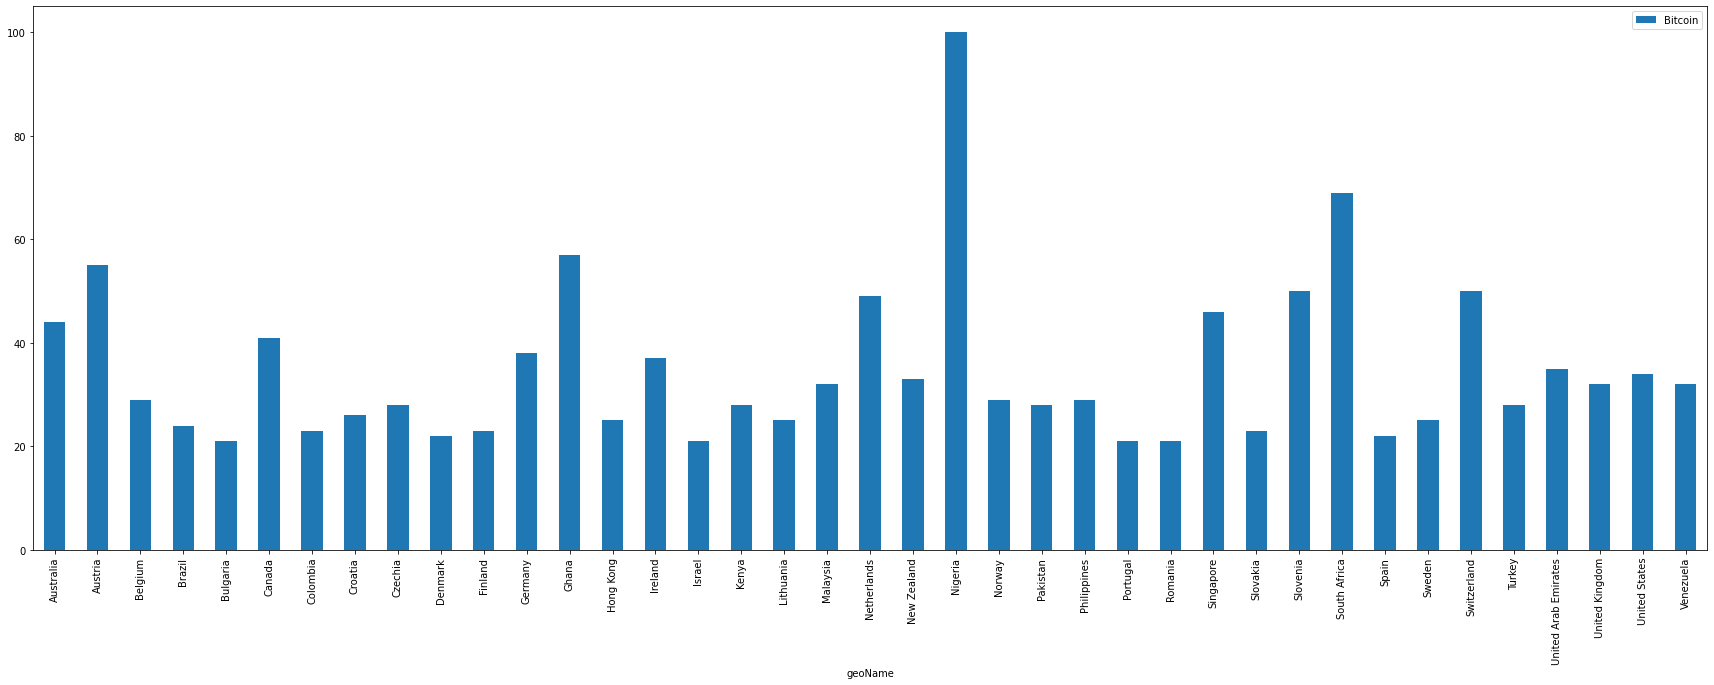

In [ ]:
df[df[token]>20].reset_index().plot(x="geoName", y=token, figsize=(30, 10), kind ="bar")

In [ ]:
df.describe()

,Bitcoin
count,250.000000
mean,6.596000
std,14.084113
min,0.000000
25%,0.000000
50%,0.000000
75%,3.500000
max,100.000000


In [ ]:
dir(pytrend)

['CATEGORIES_URL',
 'GENERAL_URL',
 'GET_METHOD',
 'GetGoogleCookie',
 'GetNewProxy',
 'INTEREST_BY_REGION_URL',
 'INTEREST_OVER_TIME_URL',
 'POST_METHOD',
 'RELATED_QUERIES_URL',
 'SUGGESTIONS_URL',
 'TODAY_SEARCHES_URL',
 'TOP_CHARTS_URL',
 'TRENDING_SEARCHES_URL',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_data',
 '_tokens',
 'backoff_factor',
 'build_payload',
 'categories',
 'cookies',
 'geo',
 'get_historical_interest',
 'google_rl',
 'hl',
 'interest_by_region',
 'interest_by_region_widget',
 'interest_over_time',
 'interest_over_time_widget',
 'kw_list',
 'proxies',
 'proxy_index',
 'related_queries',
 'related_queries_widget_list',
 'related_topics'

In [ ]:
# Get Google Hot Trends data
df = pytrend.today_searches(pn='CZ')
df

0                 Cyberpunk 2077
1                      Messenger
2                    Paolo Rossi
3    Prodloužení nouzového stavu
4             Jeziskova vnoucata
5               Dominika Gottová
6               Adriana Krnáčová
7                 Nikita Mazepin
Name: query, dtype: object

In [ ]:
df = pytrend.top_charts(2020, hl='cs', tz=300, geo='CZ')
df

,title,exploreQuery
0,Koronavirus,
1,Volby USA,
2,ČT24,
3,Google Classroom,
4,Ministerstvo zdravotnictví,
5,Office 365,
6,Netflix,
7,Slunečná,
8,Příznaky koronaviru,
9,Volby,


In [ ]:
keywords = pytrend.suggestions(keyword='Bitcoin')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')   # This column makes no sense

,title,type
0,Bitcoin,Currency
1,Bitcoin.com,Topic
2,Bitcoin Cash,Topic
3,Coinfloor,Company
4,Bitcoin Gold,Topic


In [ ]:
pytrend.build_payload(kw_list=['Bitcoin'])
related_queries = pytrend.related_queries()
related_queries[token]['top']

,query,value
0,price bitcoin,100
1,bitcoin usd,23
2,bitcoin kurs,15
3,bitcoin news,12
4,buy bitcoin,11
5,bitcoin to usd,11
6,bitcoin mining,10
7,bitcoin usd price,9
8,bitcoin cash,9
9,ethereum,9


In [ ]:
related_queries = related_queries[token]['top']
related_queries

,query,value
0,price bitcoin,100
1,bitcoin usd,23
2,bitcoin kurs,15
3,bitcoin news,12
4,buy bitcoin,11
5,bitcoin to usd,11
6,bitcoin mining,10
7,bitcoin usd price,9
8,bitcoin cash,9
9,ethereum,9


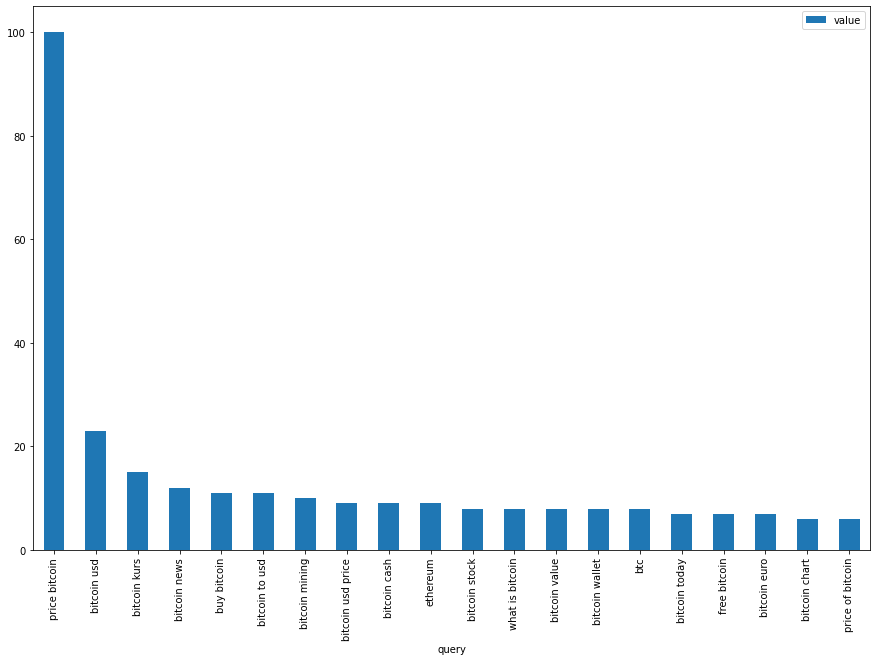

In [ ]:
related_queries[related_queries["value"]>5].plot(x='query',y='value',figsize=(15,10),kind='bar')

In [ ]:
related_queries[token]['rising']

,query,value
0,binance,26100
1,iota,24950
2,ethereum price,15050
3,bitcoin atm near me,13400
4,bitcoin to naira,11050
5,bitcoin hoje,5950
6,bitfun,5750
7,bitcoin yorum,5500
8,bitcoin fiyat grafiği,5250
9,ethereum,4700


In [ ]:
related_topic = pytrend.related_topics()
related_topic[token]['top']

,value,formattedValue,hasData,link,topic_mid,topic_title,topic_type
0,100,100,True,/trends/explore?q=/m/05p0rrx&date=today+5-y,/m/05p0rrx,Bitcoin,Currency
1,28,28,True,/trends/explore?q=/m/01d_1l&date=today+5-y,/m/01d_1l,Price,Topic
2,8,8,True,/trends/explore?q=/m/09nqf&date=today+5-y,/m/09nqf,United States Dollar,Currency
3,4,4,True,/trends/explore?q=/m/053rd&date=today+5-y,/m/053rd,Mining,Topic
4,3,3,True,/trends/explore?q=/m/018m33&date=today+5-y,/m/018m33,Exchange rate,Topic
5,3,3,True,/trends/explore?q=/m/0bhr4z&date=today+5-y,/m/0bhr4z,Value,Economics
6,3,3,True,/trends/explore?q=/m/04_x4&date=today+5-y,/m/04_x4,Money,Topic
7,2,2,True,/trends/explore?q=/m/0108bn2x&date=today+5-y,/m/0108bn2x,Ethereum,Topic
8,2,2,True,/trends/explore?q=/m/077mq&date=today+5-y,/m/077mq,Stock,Topic
9,2,2,True,/trends/explore?q=/g/11d_wtvc5k&date=today+5-y,/g/11d_wtvc5k,Bitcoin Cash,Topic


# Coinmarket

In [ ]:
pd.read_html("https://coinmarketcap.com/")

ValueError: ignored